# Thickened flame

The thickness model is explained in Theoretical and Numerical Combustion, T. Poinsot, D. Veynante. If you want more information about theory, please refer to this book.

The thickness value implemented in CERFACS Cantera version is constant. It is set by writing :
<h1 align="center">f.flame.thick = thickness_value</h1> 
with f being the Freeflame object.

## 1. Useful imports and vector/plot initialization

In [20]:
from cantera import *
import matplotlib.pylab as plt
import numpy

## 2. Setup of premixed flame

In [21]:
p          =   101325   # pressure
tin        =   300.0    # unburned gas temperature
phi        =   0.8      # equivalence ratio

## 3. Gas initialization

In [22]:
gas = Solution('BFER_methane.cti')

## 4. Gas dependent useful object

In [23]:
m = gas.n_species
x = zeros(m,'d')
fuel_species = 'CH4'
ifuel = gas.species_index(fuel_species)
io2 = gas.species_index('O2')

## 5. Fixed grid and simulation parameters

In [24]:
refine_grid = "disabled"
tol_ss    = [1.0e-5, 1.0e-8]        # [rtol atol] for steady-state problem
tol_ts    = [1.0e-5, 1.0e-8]        # [rtol atol] for time stepping
loglevel  = 1                       # amount of diagnostic output (0 to 5)

## 6. Thickening 

In [47]:
%%capture
n_points = 1000
F = [1.0, 2.0, 5.0, 10.0, 15.0, 20.0]
temperature = []
position = []

for ind_thick, thick in enumerate(F):
    gas.set_equivalence_ratio(phi, 'CH4:1', 'O2:1.0, N2:3.76')
    gas.TP = tin, p
    initial_grid = np.linspace(0, 0.02, int(1000/thick))
    f = FreeFlame(gas, grid=initial_grid)
    
    # This is where thickening is applied
    f.flame.thick = thick
    
    f.energy_enabled = True
    f.flame.set_steady_tolerances(default=tol_ss)
    f.flame.set_transient_tolerances(default=tol_ts)
    f.inlet.X = gas.X
    f.inlet.T = tin
    f.set_refine_criteria(ratio = 7.0, slope = 1, curve = 1)
    f.set_max_jac_age(50, 50)
    f.set_time_step(5.e-06, [10, 20, 80]) #s
    f.set_refine_criteria(ratio = 2.0, slope = 0.02, curve = 0.02, prune = 0.01)
    f.solve(loglevel, refine_grid)

    temperature.append(f.T)
    position.append(f.flame.grid)

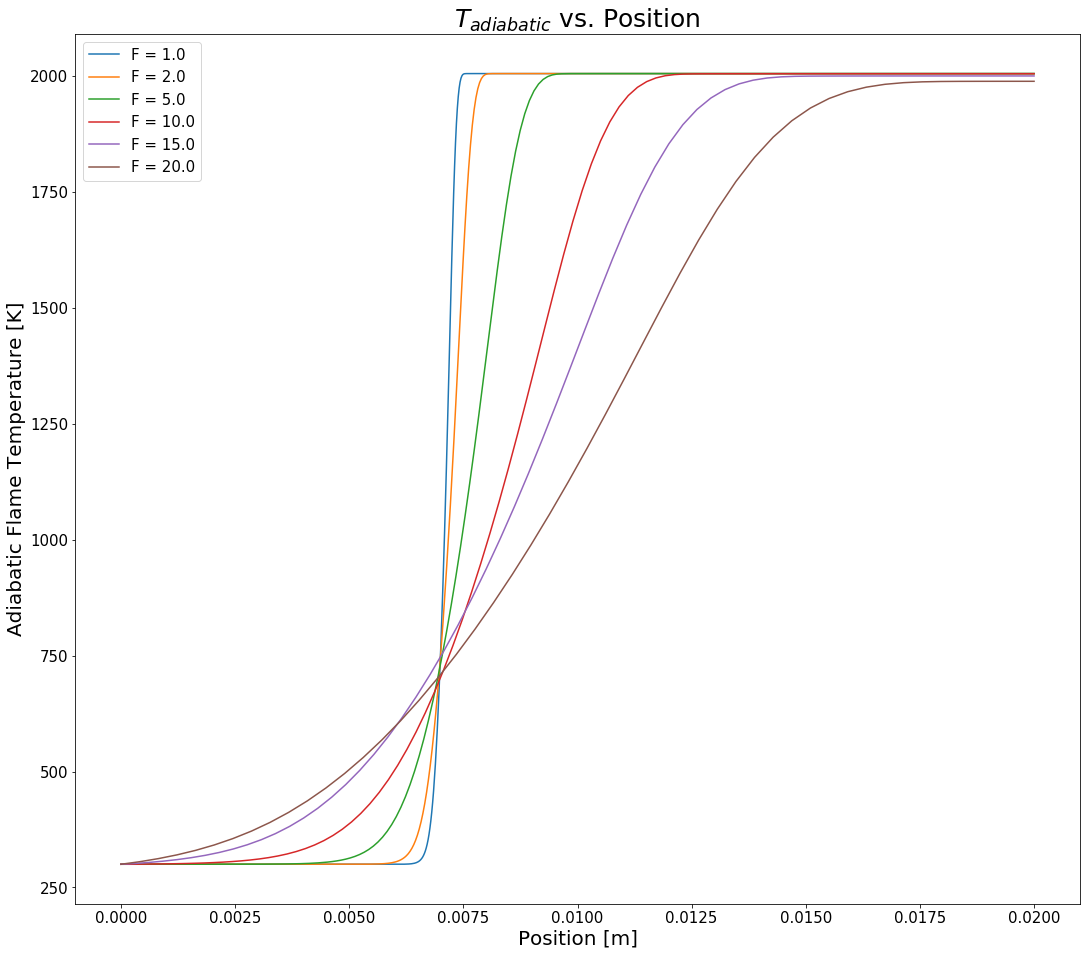

In [48]:
fig = plt.figure(figsize=(18,16))
a=fig.add_subplot(111)
for ind_thick, thick in enumerate(F):
    a.plot(position[ind_thick],temperature[ind_thick], label="F = "+str(thick))
plt.title(r'$T_{adiabatic}$ vs. Position', fontsize=25)
plt.xlabel(r'Position [m]', fontsize=20)
plt.ylabel("Adiabatic Flame Temperature [K]", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
a.xaxis.set_major_locator(MaxNLocator(10)) # this controls the number of tick marks on the axis
plt.legend(fontsize=15)